Loan Data link - https://www.kaggle.com/ninzaami/loan-predication

In [101]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data collecting and preprocessing

In [102]:
data = pd.read_csv('Loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:
data_copy = data

In [104]:
data.shape

(614, 13)

In [105]:
type(data)

pandas.core.frame.DataFrame

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [107]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
category_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in category_col:
    print(data[col].value_counts())
    print('----------------------------------------')

Male      489
Female    112
Name: Gender, dtype: int64
----------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
----------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------------------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
----------------------------------------
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
----------------------------------------
1.0    475
0.0     89
Name: Credit_History, dtype: int64
----------------------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
----------------------------------------
Y    422
N    192
Name: Loan_Status, dtype: int64
-----------

<AxesSubplot: xlabel='Gender', ylabel='count'>

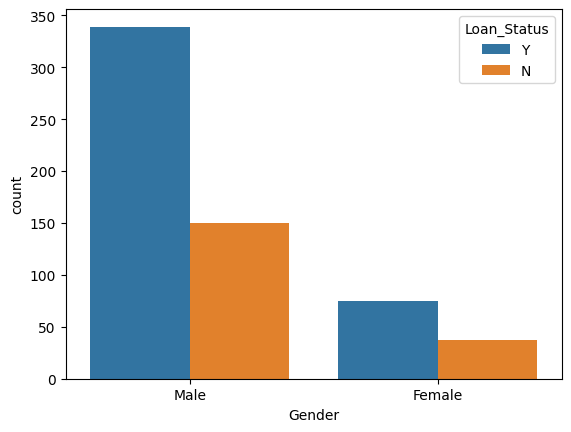

In [109]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

<AxesSubplot: xlabel='Married', ylabel='count'>

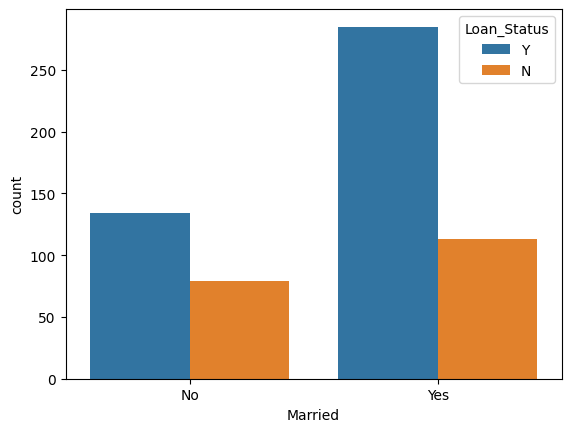

In [110]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

<AxesSubplot: xlabel='Education', ylabel='count'>

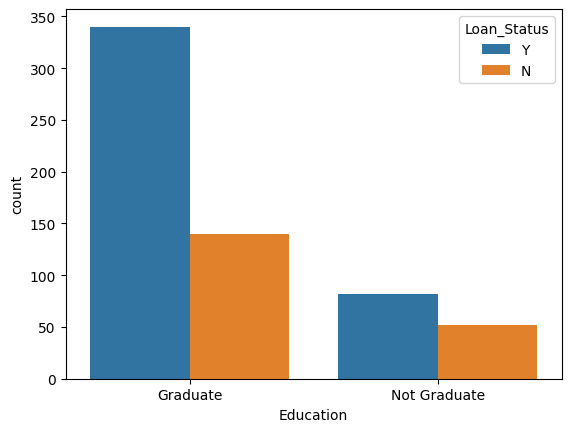

In [111]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

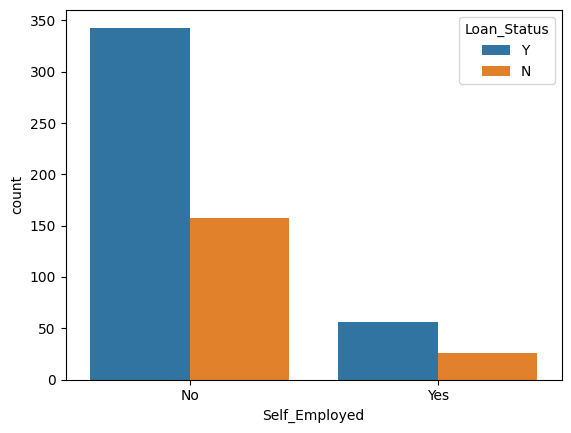

In [112]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

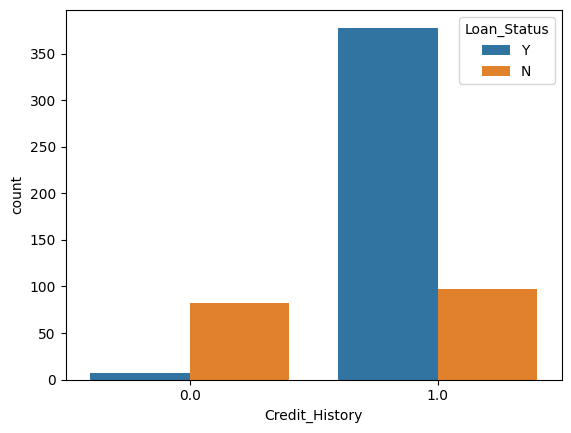

In [113]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=data)

### Replacing Null Values

In [114]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Married'].isnull().sum()

0

In [115]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Dependents'].isnull().sum()

0

In [116]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Self_Employed'].isnull().sum()

0

In [117]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['LoanAmount'].isnull().sum()

0

In [118]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Credit_History'].isnull().sum()

0

In [119]:
data.reset_index(inplace = True)

In [120]:
data = data.sort_values('LoanAmount',ascending = False)

In [121]:
data.Loan_Amount_Term.ffill(inplace = True)

In [122]:
data.sort_values('index',inplace=True)

In [123]:
data.drop(columns=['index','Loan_ID','Gender'],inplace=True)

In [124]:
data.head(10)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [125]:
data.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Converting string to integers

In [126]:
data['Dependents'] = data['Dependents'].replace(to_replace='3+', value=4)

In [127]:
data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [128]:
data['Married'] = data['Married'].map({'No':0,'Yes':1})
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].map({'No':0,'Yes':1})
data['Property_Area'] = data['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0})

In [129]:
data.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [130]:
X = data.drop('Loan_Status',axis =1)
y = pd.DataFrame(data['Loan_Status'])

In [131]:
X

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
610,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2
612,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2


In [132]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=42, train_size = 0.8)

In [135]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(491, 10) (123, 10) (491, 1) (123, 1)


## Support Vector Machine Model

In [136]:
from sklearn.metrics import accuracy_score, classification_report

In [137]:
from sklearn.svm import SVC

In [138]:
classifier = SVC(kernel = 'linear')

In [139]:
classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [140]:
# Testing data prediction
test_pred = classifier.predict(xtest)

In [141]:
accuracy_score(ytest,test_pred )

0.7967479674796748

In [142]:
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



In [143]:
df = pd.DataFrame()
df['Actual_testdata'] = ytest
df['Predicted_testdata'] = test_pred

In [144]:
df.head(20)

,Actual_testdata,Predicted_testdata
350,1,1
377,1,1
163,1,1
609,1,1
132,1,1
578,1,1
316,1,1
2,1,1
340,0,1
77,0,1


In [145]:
# Training Data Prediction
train_pred = classifier.predict(xtrain)

In [146]:
print(classification_report(ytrain, train_pred))

              precision    recall  f1-score   support

           0       0.90      0.38      0.53       149
           1       0.78      0.98      0.87       342

    accuracy                           0.80       491
   macro avg       0.84      0.68      0.70       491
weighted avg       0.82      0.80      0.77       491



Text(0, 0.5, 'Predicted value')

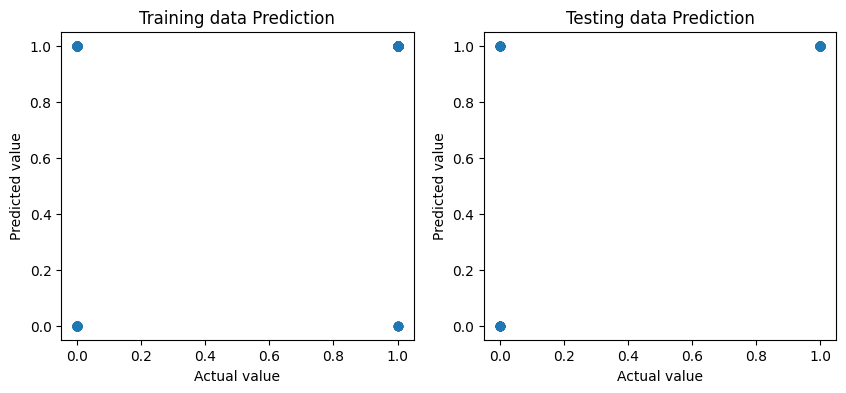

In [147]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(ytrain, train_pred)
plt.title('Training data Prediction')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

plt.subplot(1,2,2)
plt.scatter(ytest, test_pred)
plt.title('Testing data Prediction')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

## Logistic Regression 

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
model = LogisticRegression().fit(xtrain, ytrain)

In [150]:
#Testing dataPrediciton
test_pred = model.predict(xtest)
accuracy_score(ytest,test_pred )

0.7886178861788617

In [151]:
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [152]:
#Training dataPrediction
train_pred = model.predict(xtrain)
accuracy_score(ytrain,train_pred )

0.814663951120163

In [153]:
print(classification_report(ytrain, train_pred))

              precision    recall  f1-score   support

           0       0.89      0.44      0.59       149
           1       0.80      0.98      0.88       342

    accuracy                           0.81       491
   macro avg       0.85      0.71      0.74       491
weighted avg       0.83      0.81      0.79       491

